<a href="https://colab.research.google.com/github/TheBigDen/dap-2024/blob/main/les5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


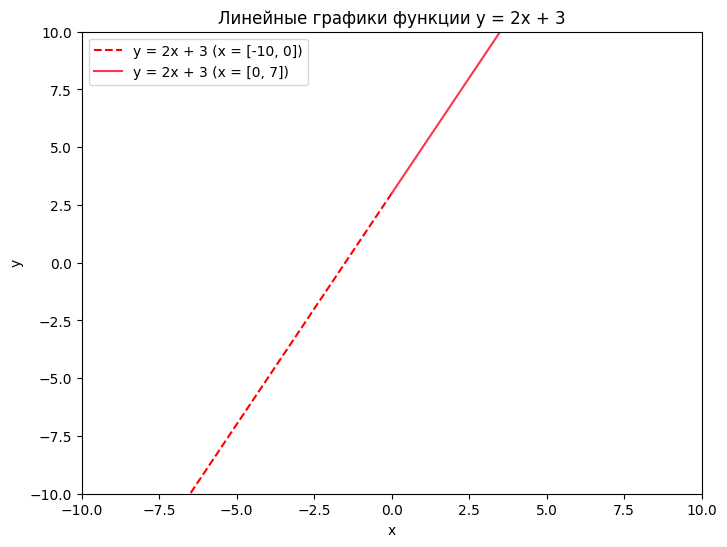

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Построение функции y = 2x + 3
x1 = np.linspace(-10, 0, 100)
x2 = np.linspace(0, 7, 100)
y1 = 2 * x1 + 3
y2 = 2 * x2 + 3

# Создаем график
plt.figure(figsize=(8,6))

# Первый график (x = [-10, 0])
plt.plot(x1, y1, 'r--', label='y = 2x + 3 (x = [-10, 0])')

# Второй график (x = [0, 7])
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), label='y = 2x + 3 (x = [0, 7])')

# Настройка осей и графика
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейные графики функции y = 2x + 3')
plt.legend()

# Показать график
plt.show()


Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (8).csv

Первые строки загруженного файла:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000

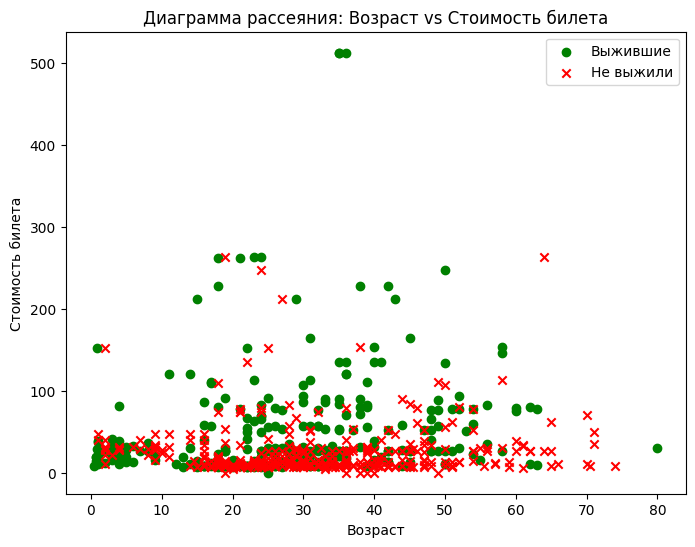

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()  # Открывается окно для загрузки файла

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]  # Получаем имя загруженного файла
df = pd.read_csv(file_name)

# Проверка, что файл успешно загружен
if df.empty:
    print("Файл пуст. Пожалуйста, загрузите корректный файл titanic.csv.")
else:
    print("\nПервые строки загруженного файла:")
    print(df.head())

    # Фильтрация данных
    df = df.dropna(subset=['Age', 'Fare'])  # Убираем строки с пустыми значениями

    # Создаем график рассеяния
    plt.figure(figsize=(8, 6))

    # Выжили (Survived == 1) - зеленый круг
    plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], c='green', label='Выжившие', marker='o')

    # Не выжили (Survived == 0) - красный крест
    plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], c='red', label='Не выжили', marker='x')

    # Подписи и заголовок
    plt.xlabel('Возраст')
    plt.ylabel('Стоимость билета')
    plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета')
    plt.legend()

    # Показать график
    plt.show()


Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

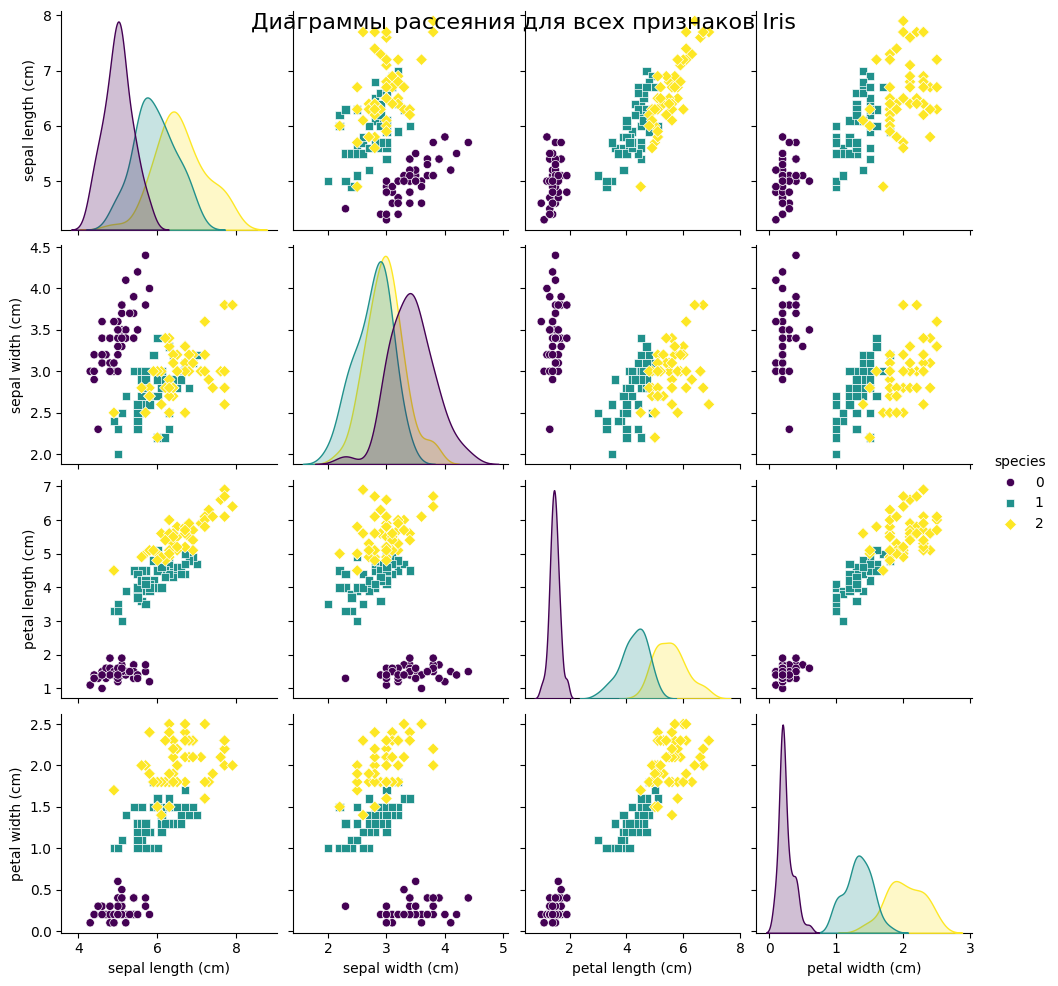

In [5]:
from sklearn.datasets import load_iris
import seaborn as sns

# Загружаем данные
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

# Построение 16 диаграмм рассеяния
sns.pairplot(df_iris, hue='species', palette='viridis', markers=["o", "s", "D"])

# Показать график
plt.suptitle('Диаграммы рассеяния для всех признаков Iris', size=16)
plt.show()



Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (9).csv


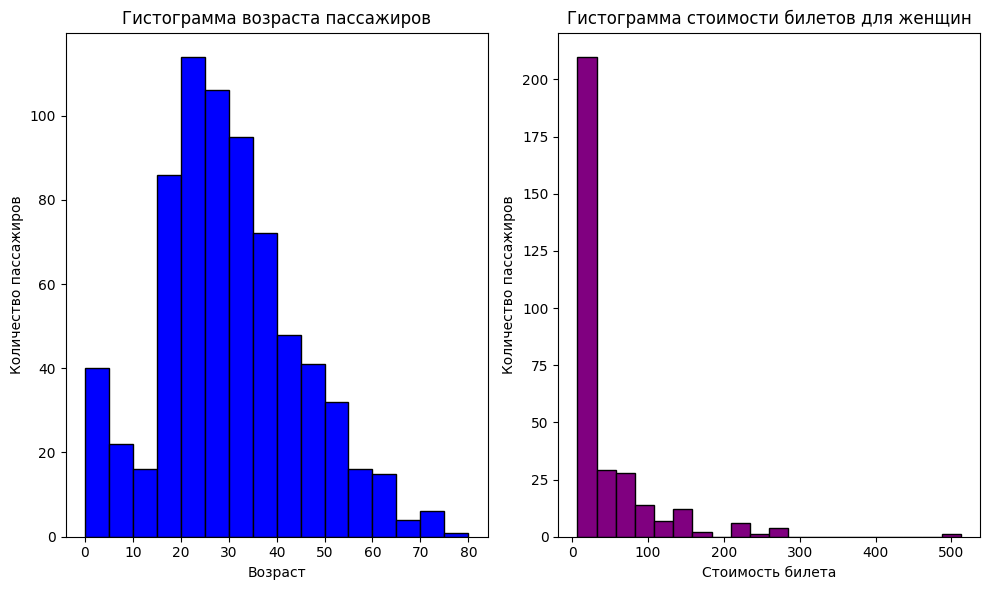

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Гистограмма возраста пассажиров
plt.figure(figsize=(10, 6))
plt.subplot(121)
df_age_filtered = df.dropna(subset=['Age'])
plt.hist(df_age_filtered['Age'], bins=range(0, 81, 5), color='blue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма возраста пассажиров')

# Гистограмма стоимости билетов для женщин
plt.subplot(122)
df_female_filtered = df[(df['Sex'] == 'female') & df['Fare'].notna()]
plt.hist(df_female_filtered['Fare'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма стоимости билетов для женщин')

plt.tight_layout()
plt.show()


Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (10).csv


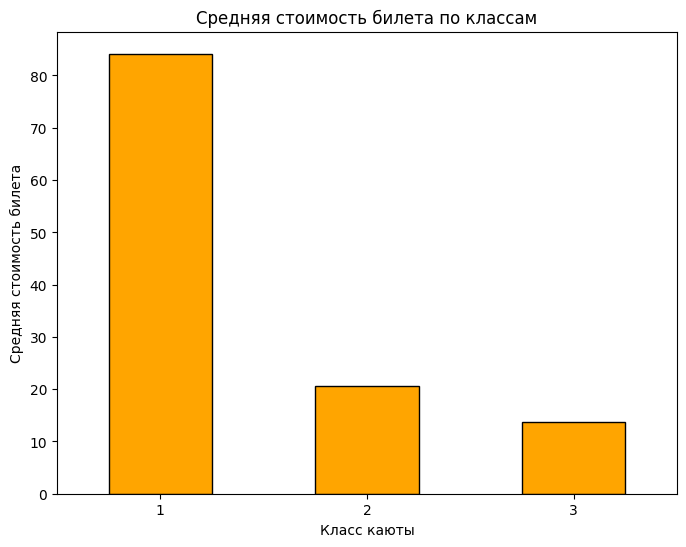

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Средняя стоимость билетов по классам
plt.figure(figsize=(8, 6))
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean()
avg_fare_by_class.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Класс каюты')
plt.ylabel('Средняя стоимость билета')
plt.title('Средняя стоимость билета по классам')
plt.xticks(rotation=0)
plt.show()


Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (11).csv


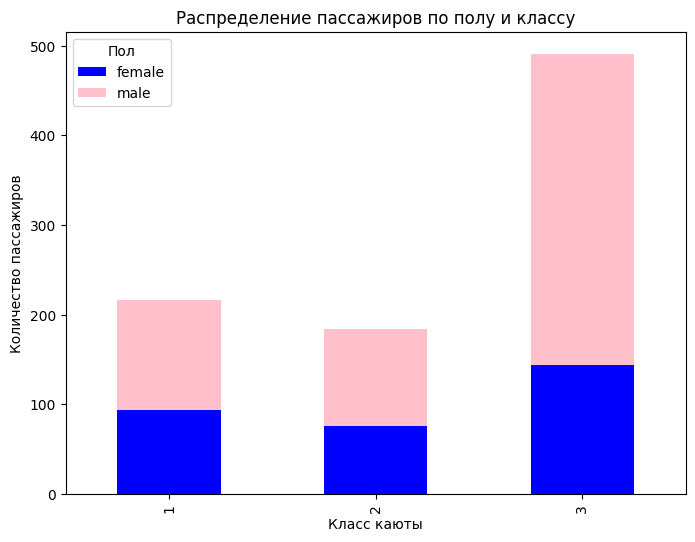

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Столбчатая диаграмма с накоплением
sex_class_count = pd.crosstab(df['Pclass'], df['Sex'])
sex_class_count.plot(kind='bar', stacked=True, color=['blue', 'pink'], figsize=(8, 6))
plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.title('Распределение пассажиров по полу и классу')
plt.legend(title='Пол')
plt.show()


Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (12).csv


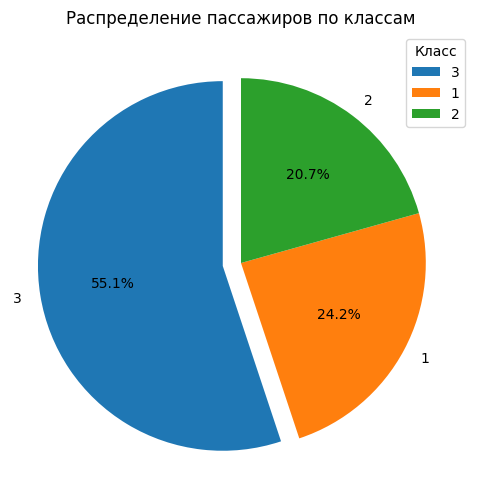

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Круговая диаграмма
pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0))
plt.title('Распределение пассажиров по классам')
plt.legend(title='Класс')
plt.show()


Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

Загрузите файл titanic.csv:


Saving titanic.csv to titanic (13).csv


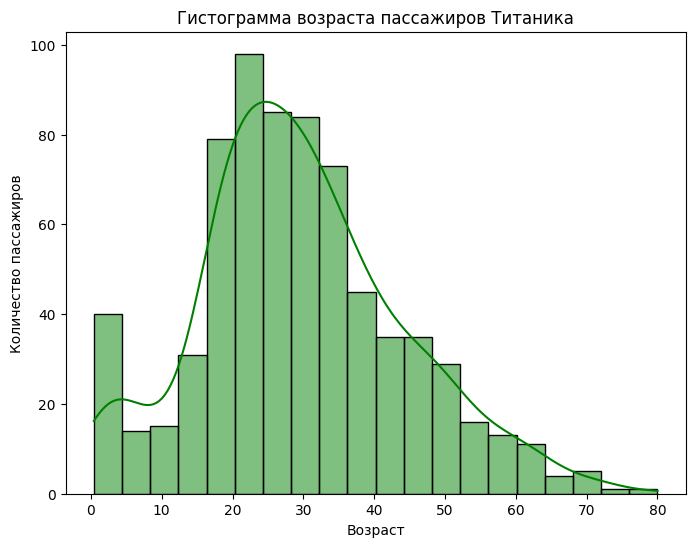

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка файла titanic.csv вручную
print("Загрузите файл titanic.csv:")
uploaded = files.upload()

# Чтение загруженного файла
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Гистограмма возраста пассажиров
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='green', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма возраста пассажиров Титаника')
plt.show()


## Вопросы


### Ответы на вопросы

#### 1. Для чего используется диаграмма рассеяния?
Диаграмма рассеяния используется для визуализации связи между двумя числовыми переменными. Она позволяет выявить корреляции, закономерности и выбросы в данных.

---

#### 2. Что такое гистограмма, чем она отличается от столбчатой диаграммы?
- **Гистограмма**: График, который показывает распределение числовых данных по интервалам (бинам). Высота столбцов отражает частоту значений в каждом интервале.
- **Столбчатая диаграмма**: Используется для сравнения категорий. Высота столбцов представляет числовое значение для каждой категории.
- Основное отличие: гистограмма отображает **распределение числовых данных**, а столбчатая диаграмма — **сравнение категорий**.

---

#### 3. Как задать цвет линии в линейном графике Matplotlib?
Цвет линии задается через параметр `color`. Можно использовать:
- Название цвета: `'red'`, `'blue'`, и т. д.
- Шестнадцатеричный код: `'#FF5733'`.
- RGB-кортеж: `(1.0, 0.2, 0.3)`.
```python
plt.plot(x, y, color='red')
```

---

#### 4. Чем класс `plt.Figure` отличается от объекта `plt.Axes`?
- **`plt.Figure`**: Это контейнер, который содержит весь график, включая оси, метки, легенду и другие элементы.
- **`plt.Axes`**: Это конкретная область внутри графика, где отображается один набор данных (график, диаграмма и т. д.).
- Одной фигуре (`Figure`) может соответствовать несколько осей (`Axes`).

---

#### 5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
**Нет.** В Matplotlib можно управлять типом маркера в графике scatter с помощью параметра `marker`.
```python
plt.scatter(x, y, marker='o')  # Круглый маркер
plt.scatter(x, y, marker='x')  # Крест
```

---

#### 6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
**Нет.** Существуют другие библиотеки, такие как:
- **Seaborn** (для статистической визуализации).
- **Plotly** (для интерактивных графиков).
- **Bokeh** (для веб-визуализации).
- **Altair** и другие.

---

#### 7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
**Нет.** В Matplotlib можно сохранить график с помощью метода `savefig()`.
```python
plt.savefig('graph.png')  # Сохранение графика в PNG
```

---

#### 8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
**Нет.** В наборе данных `iris` представлены 3 вида ирисов:
- Setosa
- Versicolor
- Virginica

---

#### 9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
**Нет.** В наборе данных Titanic есть пропущенные значения возраста.

---

#### 10. На одном холсте может располагаться не более 16 диаграмм, это обусловлено тем, что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны. Да или нет?
**Нет.** На одном холсте можно расположить больше 16 диаграмм, если уменьшить их размер. В Matplotlib можно управлять размером холста и подстраивать графики.
```python
fig, axes = plt.subplots(4, 5, figsize=(15, 10))  # 20 графиков
```